<a href="https://colab.research.google.com/github/rautvaishnavi/OIBSIP/blob/main/Task_3_Oasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Vaishnavi Raut**

## **Task 3 : Car Price Prediction 🚗🚗**

**Steps Performed:**

1. Importing the Dependencies
2. Loading the Dataset
3. Preprocessing the Dataset
4. Splitting the Dataset into Training and Testing Data
5. Training the Linear Regression Model
6. Visualizing the Predicted Prices
7. Training the Lasso Regression Model
8. Visualizing the Predicted Prices

**1. Importing the Dependencies**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**2. Loading the Dataset**

In [ ]:
#Loading the Dataset into a variable
car_data = pd.read_csv('/content/car data.csv')

**3. Preprocessing the Data**

In [ ]:
#Let's print the first 5 rows of the dataset
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Let's check the number of rows and columns the dataset has
car_data.shape

(301, 9)

In [ ]:
#Let's try to get some information
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#For finding if there are some missing values present or not let's run the below code
car_data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Let's print the categorial columns first and then convert them into values
print(car_data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [ ]:
print(car_data.Selling_type.value_counts())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [ ]:
print(car_data.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#Let's not convert these categorial columns into values

#Converting Fuel Type First

car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Converting Selling type now

car_data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

#Converting Transmission Type now

car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**4. Splitting the Data into Training and Testing Data**

In [ ]:
#Let's now split the Training and Testing Data
X = car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_data['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

**5. Training the Linear Regression Model**

In [ ]:
#Training the Linear Regression model
lin_model = LinearRegression()

In [ ]:
lin_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Prediction on the Training Data
train_data_prediction = lin_model.predict(X_train)

In [ ]:
# Using R Squared Error
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R Squared Error :", error_score)

R Squared Error : 0.8834899874176637


**6. Visualizing the Predicted Prizes**

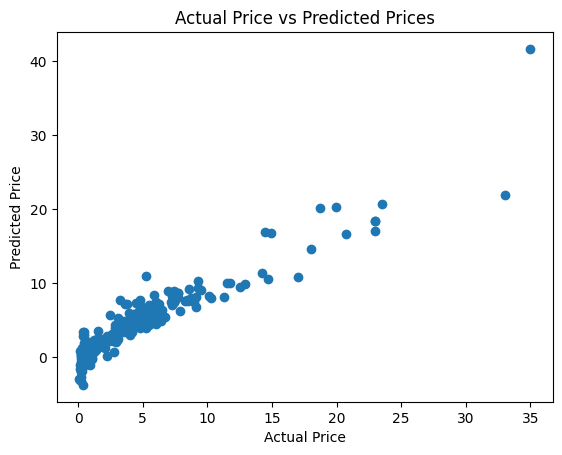

In [ ]:
#Let's now visualize Actual Price and Predicted Price
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [ ]:
#Now let us do the prediction on the Testing Data
test_data_prediction = lin_model.predict(X_test)

In [ ]:
#Now using R Squared Method let us calculate the score
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error :", error_score)

R Squared Error : 0.8401415675614679


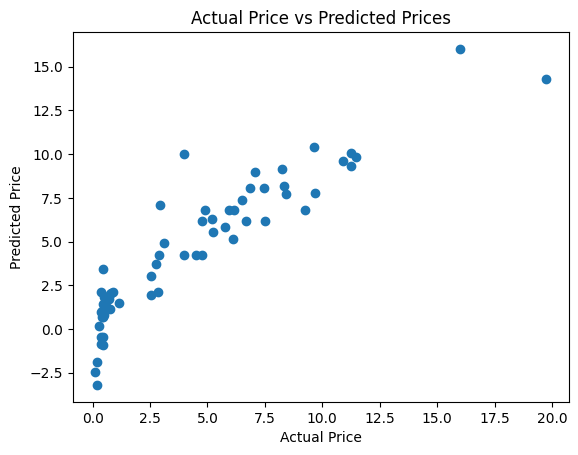

In [ ]:
#Let's now visualize Actual Price and Predicted Price
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

**7. Training the Lasso Regression Model**

In [ ]:
#Training the Linear Regression model
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [ ]:
#Prediction on the Training Data
train_data_prediction = lasso_model.predict(X_train)

In [ ]:
# Using R Squared Error
error_score = metrics.r2_score(Y_train, train_data_prediction)
print("R Squared Error :", error_score)

R Squared Error : 0.8432138799266458


**8. Visualizing the Predicted Prices**

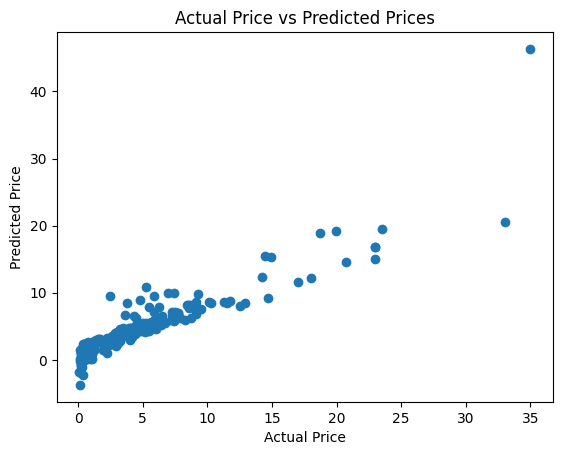

In [ ]:
#Let's now visualize Actual Price and Predicted Price
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [ ]:
#Now let us do the prediction on the Testing Data
test_data_prediction = lasso_model.predict(X_test)

In [ ]:
#Now using R Squared Method let us calculate the score
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error :", error_score)

R Squared Error : 0.8497230266019153


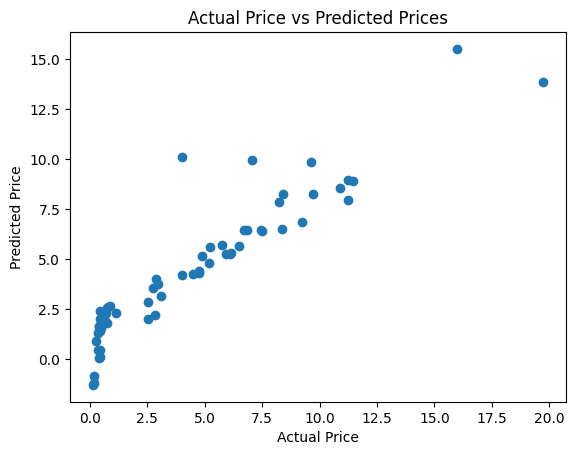

In [ ]:
#Let's now visualize Actual Price and Predicted Price
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()